In [ ]:
!pip install missingno
 

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# Start writing code here...
import missingno as m

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline

In [2]:
train = pd.read_csv('train.csv',index_col='id')
print(train.shape)
train.head()

(300000, 25)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,A,B,D,A,E,C,I,...,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
2,B,A,A,A,B,B,A,E,A,F,...,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
3,A,A,A,C,B,D,A,B,C,N,...,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
4,A,A,A,C,B,D,A,E,G,K,...,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
6,A,B,A,A,B,B,A,E,C,F,...,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [3]:
test =  pd.read_csv('test.csv',index_col='id')
print(test.shape)
test.head()

(200000, 24)


,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
id,,,,,,,,,,,,,,,,,,,,,
0,A,B,A,C,B,D,A,E,E,G,...,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
5,A,B,A,C,B,D,A,E,C,L,...,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
15,A,B,A,C,B,D,A,E,C,F,...,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
16,A,A,B,A,B,D,A,E,E,F,...,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
17,A,B,A,A,B,B,A,E,E,I,...,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


<AxesSubplot:>

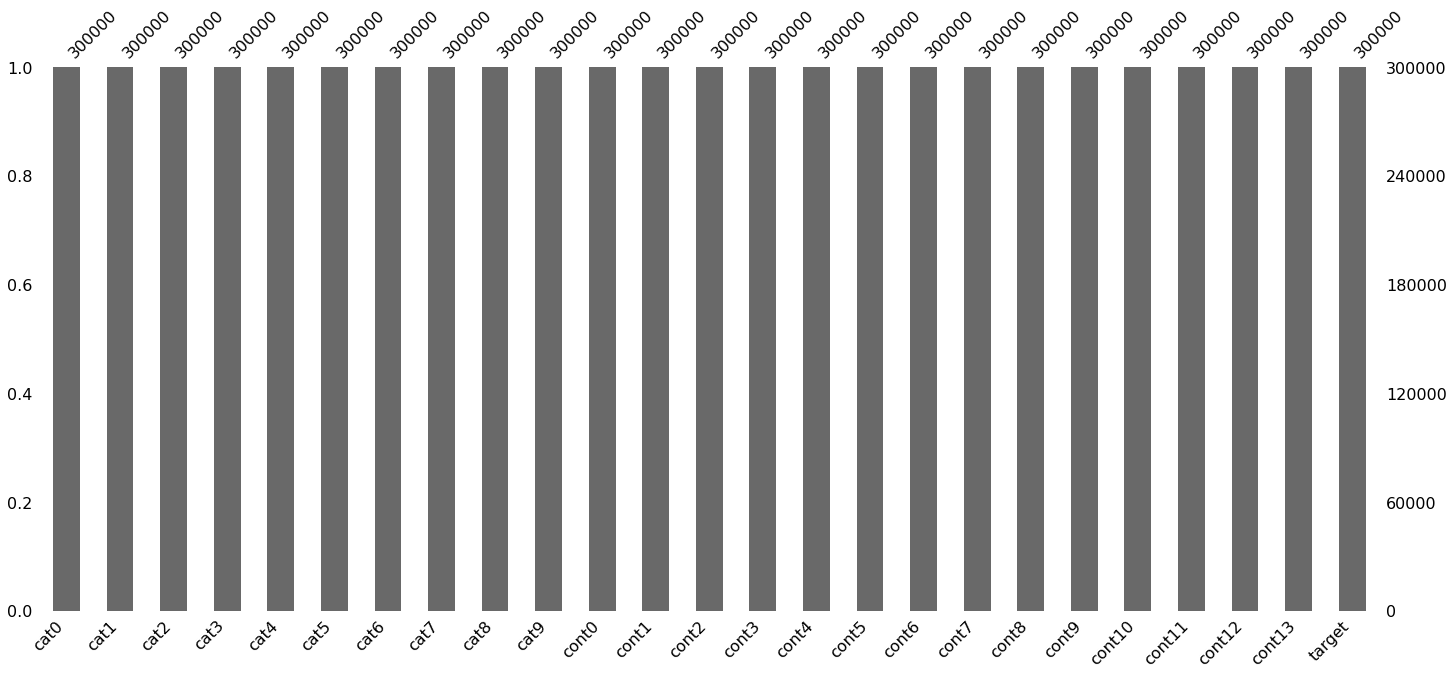

In [ ]:
m.bar(train)

<AxesSubplot:>

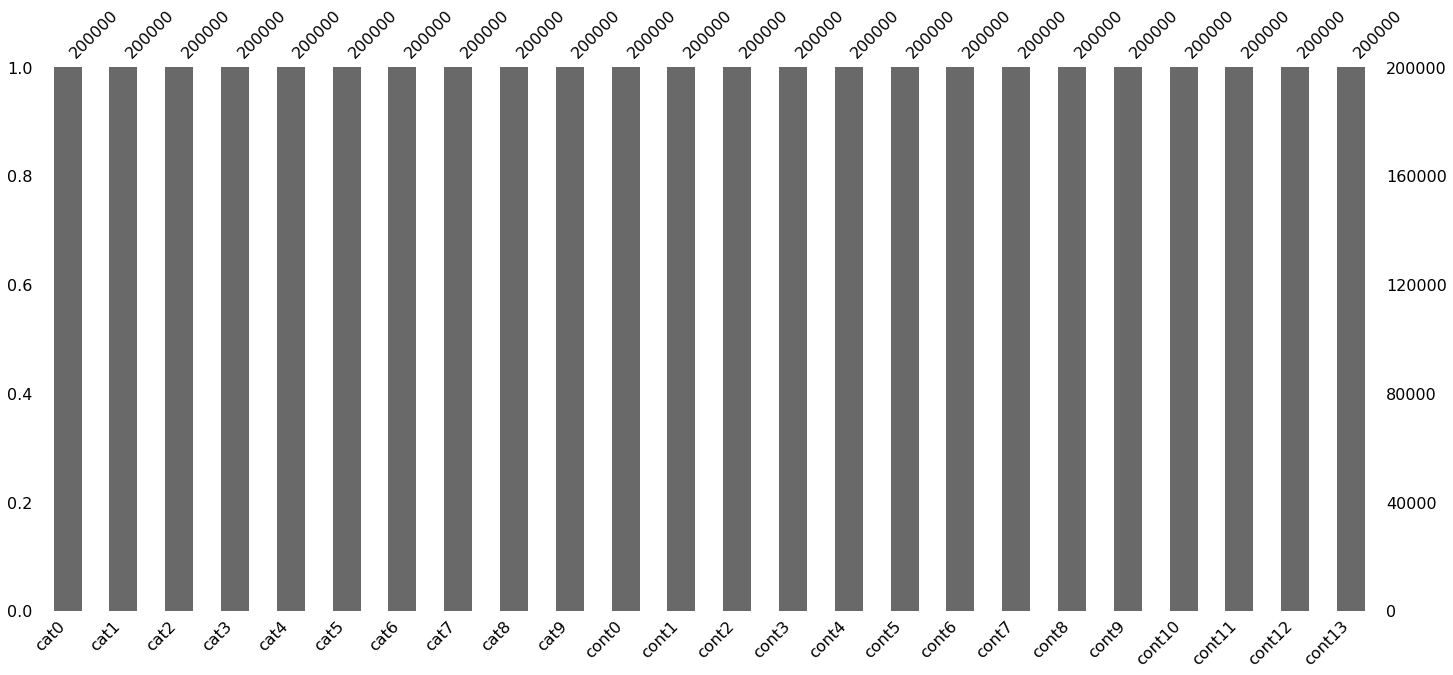

In [ ]:
m.bar(test)

In [4]:
train.nunique()

cat0           2
cat1           2
cat2           2
cat3           4
cat4           4
cat5           4
cat6           8
cat7           8
cat8           7
cat9          15
cont0     299830
cont1     299642
cont2     299707
cont3     299796
cont4     299736
cont5     299857
cont6     299875
cont7     299832
cont8     299765
cont9     299863
cont10    299894
cont11    299877
cont12    299824
cont13    299866
target    299648
dtype: int64

In [6]:
pd.pivot_table(train,columns = ['cat0'],aggfunc='size')

cat0
A    281471
B     18529
dtype: int64

In [ ]:
num_cols = train.select_dtypes(exclude = ['object'])
cat_cols = train.select_dtypes(include = ['object'])
num_colss = num_cols.drop('target',axis = 'columns')
num_vars = num_colss.columns.tolist()
cat_vars = cat_cols.columns.to_list()

In [17]:
X = train.drop(['target'],axis = 1)
y = train.target

<AxesSubplot:>

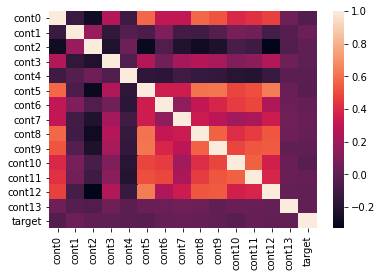

In [ ]:
import seaborn as sns
sns.heatmap(train.corr())

<AxesSubplot:>

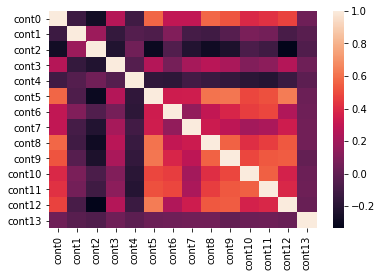

In [ ]:
import seaborn as sns
sns.heatmap(test.corr())

In [18]:
import xgboost

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.compose import ColumnTransformer
from xgboost import XGBRegressor

In [20]:
numerical_transformer = Pipeline(steps=
[('scale',StandardScaler()),
('impute',SimpleImputer(strategy='median'))])

categorical_transformer = Pipeline(steps=
[('impute',SimpleImputer(strategy='most_frequent')),
('ohe',OneHotEncoder(handle_unknown='ignore'))])

preprocessing = ColumnTransformer(transformers=[('num',numerical_transformer,num_vars),('cat',categorical_transformer,cat_vars)])
model = XGBRegressor(n_estimators = 100,learning_rate = 0.1,random_state = 42)
preprocessing


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scale', StandardScaler()),
                                                 ('impute',
                                                  SimpleImputer(strategy='median'))]),
                                 ['cont0', 'cont1', 'cont2', 'cont3', 'cont4',
                                  'cont5', 'cont6', 'cont7', 'cont8', 'cont9',
                                  'cont10', 'cont11', 'cont12', 'cont13']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['cat0', 'cat1', 'cat2', 'cat3', 'cat4',
                                  'cat5', 'cat6', 'cat7', 'cat8', 'cat9'])])

In [22]:
pipe = Pipeline(steps=[('preprocessor',preprocessing),('model',model)])
pipe.fit(X,y)
ypred = pipe.predict(test)

In [36]:
ypred.shape

(200000,)

In [37]:
X_test = pd.read_csv('test.csv')
X_test.columns





Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5',
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13'],
      dtype='object')

In [40]:
df = pd.DataFrame()
df['id'] = X_test['id']
df['target'] = ypred
df.to_csv('submission.csv',index = False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4ad0af6-bda7-4005-891d-55dd04dd7cfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>